<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Chi2_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Hypothesis Testing - Chi-Square Tests

## Prepare 
In the last lecture, we learned about the t-test, which allows you to weigh evidence for or against the claim that mean of a population is equal to a reference value (the null hypothesis).

T-tests are often the appropriate statistical test when you are working with a a quantitative, continuous variable.

However, there are lots of other kinds of data and many other methods of data analysis.  For example, we might like to examine the relationship between two categorical variables.  In that case, we'd like to use a chi-square test.  "Chi-square" refers to a particular statistical distribution in the way that the t-test is called the t-test because it depends on the t-distribution.

The chi-square test works - in general - by comparing the counts that actually appear in a two-way table to the counts we would expect to see if the two variables were not related to each other at all.

[More about the Chi-square test](https://https://en.wikipedia.org/wiki/Chi-squared_test).


## Titanic Example

In the early hours of April 15, 1912, the unsinkable ship RMS Titanic sank when it struck an iceberg, killing more than half of the passengers and crew aboard. 

The Titanic.csv dataset contains demographic information for 889 of those passengers as well as a record of whether or not each passenger survived. 

Our goal is to determine if there is a relationship between ticket class and passneger survival on the Titanic.



A chi-square test *always* tests the null hypothesis that there is *no* relationship between two variables vs. the alternative hypothesis that there *is* some relationship between the two variables.


Therefore, in this exmaple

**Ho:** There is no relationship between passenger ticket class and survival on the Titanic.

**Ha:** There is a relationship between passenger ticket class and survival on the Titanic.

In [1]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Titanic.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Survived = 0 means the passenger did not survive and 
Surivived = 1 means the passenger did survive.

Pclass = 1, 2, 3 indicates the passenger had a 1st, 2nd or 3rd class ticket, respectively.

To start, let's look at the freqeuncy and relative frequency of surival on the Titanic.

In [2]:
#Frequency of survival

survival = pd.crosstab(index=df["Survived"], columns="count")

survival

col_0,count
Survived,
0,545
1,342


In [3]:
#Relative frequency of survival.  Multiply by 100 to convert from
#proportions to percents

survival/survival.sum()*100


col_0,count
Survived,
0,61.443067
1,38.556933


Survival results here:   


Now let's look at the frequency and relative frequency of ticket class.


In [4]:
#Frequency and relative frequency of ticket class.

ticket_class = pd.crosstab(index=df["Pclass"], columns="count")

ticket_class

col_0,count
Pclass,
1,216
2,184
3,487


In [5]:
ticket_class/ticket_class.sum()*100

col_0,count
Pclass,
1,24.351747
2,20.744081
3,54.904171


Passenger class results here: 

Now let's look at the joint distribution of survival by passenger class.  That means we want to see how many people fall into each combination of the two categories.

In [6]:
#Joint distribution

pd.crosstab(df["Pclass"], df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,368,119


So... is there a relationship between ticket class and survival?  

Let's begin by including the marginal distribution of each variable.  We actually calculated those before, but we can add them to the "margins" of the two-way table (hence the name marginal distribution) so we can remember how many people survived overall and how many people were in each ticket class overall.

In [7]:
# Joint distribution with margins

pd.crosstab(df["Pclass"], df["Survived"], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,368,119,487
All,545,342,887


But what we really want to know is "Of people in each ticket class, what proportion survived?"  We can compare those proportions and see if they are the same or different.

We use "normalize = index" to tell Python that we want to compute the proportion of individuals who did and did not survive by the row variable (what Python calls the index variable).  

In statistical terminology, we call this the conditional distribution.  We are computing the distribution of survival *conditional* on what passenger class they were in.

In [8]:
#Conditional distribution of survival by passenger class

pd.crosstab(df["Pclass"], df["Survived"], normalize="index")*100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.564682,24.435318


We observe:

But because we haven't actually computed a statistical test, we don't know for sure if there is strong evidence that there is a relationship between ticket class and survival.  That's where the Chi-Square test comes in.

As a refresher:

**Ho:** There is no relationship between passenger ticket class and survival on the Titanic.

**Ha:** There is a relationship between passenger ticket class and survival on the Titanic.

Just like in the t-test examples, if the p-value is less than the significance level, we will reject the null hypothesis.  If the p-value is greater than the significance level, we will fail to reject.

We import the chi-square function (chi2_contingency) from scipy.stats.  

**Take a very close look at the entry in the contingency table function**. It is the *table* we created above, not just the two variables of interest.

The chi2_contingency function has a lot of output, but we are most interested in the p-value, which we are calling p below.  

In [9]:
from scipy.stats import chi2_contingency

#Chi-square test

stat, p, dof, expected = chi2_contingency(pd.crosstab(df["Pclass"], df["Survived"]))

p

1.0496962042983216e-22

P-value = 1e-22

So... we definitely think that passenger ticket class is related to the survival rate

Let's make a nice visualization - a side by side bar plot - to illustrate this relationship.



First, let's take a look at our conditional distribution of survival by passenger class again.

In [11]:
#Copy code for conditional distribution of survival by passenger class here:

pd.crosstab(df["Pclass"], df["Survived"], normalize="index")*100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.564682,24.435318


We'd like to create a bar plot where we compare the percent of surivors in each passenger class.

We're going to start by creating two vectors: one for the percent of individuals who survived and one for the percent of individuals who didn't survive and plotting those with the help of some graphing parameters that are going to make everything line up nicely.

[More info about barplots](https://https://matplotlib.org/examples/api/barchart_demo.html).

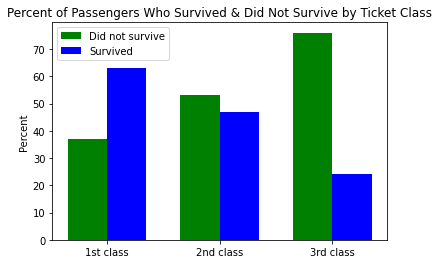

In [12]:
import matplotlib.pyplot as plt

# Need this for graphing purposes - it's the number of passenger classes
N = 3 


Died = (37, 53, 76) # Percent that died in each ticket class
Survived = (63, 47, 24) #Percent that survived in each ticket class

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='g') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel("Percent")
ax.set_title("Percent of Passengers Who Survived & Did Not Survive by Ticket Class")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(("1st class", "2nd class", "3rd class"))

ax.legend((rects1[0], rects2[0]), ("Did not survive", "Survived"))

plt.show()


We can see by our lovely graph and chi-square test that:



---



Now let's look at passenger sex and survival?  Were women and children really the first ones in the lifeboats?

Note that here both child and adult males are considered male and child and adult females are considered female in the data so we really can't conclude anything about children from this analysis.


First, is a chi-square test appropriate for these data?

Answer: 

What is the distribution of passenger sex on the Titanic?

In [13]:
# Gender crosstab

gender = pd.crosstab(df["Sex"], columns="count")

gender

col_0,count
Sex,
female,314
male,573


In [14]:
#Relative frequency of gender

gender/gender.sum()*100

col_0,count
Sex,
female,35.400225
male,64.599775


Passengers on the Titanic were...

Refresh your memory by calculating the distribution of passenger survival.

In [16]:
#Frequency of survival
survival



col_0,count
Survived,
0,545
1,342


Survival results: 

Calculate the joint distribution of passenger sex and survival.  Add on the margins.  Can you draw any initial conclusions about the relationship between passenger sex and survival?

In [18]:
#Joint distribution and joint distribution adding margins.

pd.crosstab(df['Sex'],df['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,464,109,573
All,545,342,887


Results: More males died than survived and more females survived than died. That's a clue that passenger sex and survival are probably related

Calculate the distribution of survival conditional on passenger sex.  What does this tell you?

In [19]:
#Conditional distribution of survival by passenger sex

pd.crosstab(df["Sex"], df["Survived"], normalize="index")*100

Survived,0,1
Sex,,
female,25.796178,74.203822
male,80.977312,19.022688


Results: 

Now we need to conduct the chi-square test.  What are our hypotheses?

**Ho:** There is no relationship between passenger sex and survival.

**Ha:** There is a relationship between passenger sex and survival.

In [20]:
#chi-square test

stat, p, dof, expected = chi2_contingency(pd.crosstab(df["Sex"], df["Survived"]))

p

3.847574039733745e-58

What is the p-value?  What do we conclude (at the 0.05 significance level) about the relationship between passenger sex and survival?

Results: At 0.05 significance level, I reject the null hypothesis and suggest there is a statistically significant relationship between passenger sex and survival.

Create a side-by-side bar plot illustrating the relationship of passenger sex and survival.  

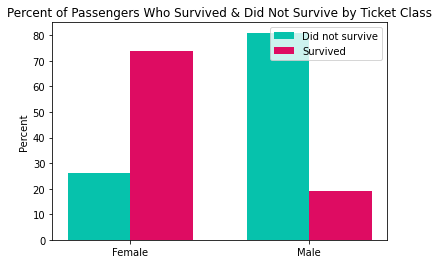

In [21]:
#Need this for graphing purposes - it's the number of sexes (male and female)

N = 2


Died = (26, 81)
Survived = (74, 19)

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='#06c2ac') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='#de0c62') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel("Percent")
ax.set_title("Percent of Passengers Who Survived & Did Not Survive by Ticket Class")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(("Female", "Male"))

ax.legend((rects1[0], rects2[0]), ("Did not survive", "Survived"))

plt.show()

Explain your results to someone who is interested in Titanic history but knows little about statistics.